In [1]:
import pandas as pd
import seaborn  as sns
import matplotlib.pyplot as plt

In [2]:
df_movies= pd.read_csv('/content/movies.csv')

In [3]:
df_movies.shape

(9742, 3)

In [4]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
df_ratings=pd.read_csv('/content/ratings.csv')

In [6]:
df_ratings.shape

(100836, 4)

In [7]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
df_ratings["userId"].nunique()

610

In [9]:
df = df_movies.merge(df_ratings, how = "left", on = "movieId")

In [10]:
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,9.649827e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,8.474350e+08
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,4.5,1.106636e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.5,1.510578e+09
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,4.5,1.305696e+09


In [11]:
df["title"].value_counts()

,count
title,
Forrest Gump (1994),329
"Shawshank Redemption, The (1994)",317
Pulp Fiction (1994),307
"Silence of the Lambs, The (1991)",279
"Matrix, The (1999)",278
...,...
Pride (2007),1
We're Back! A Dinosaur's Story (1993),1
Black Book (Zwartboek) (2006),1


In [12]:
df_movies[df_movies['title']=='Matrix, The (1999)']

,movieId,title,genres
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [13]:
df_movies[df_movies['title']=='Terminator 2: Judgment Day (1991)']

,movieId,title,genres
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi


In [14]:
df_ratings[df_ratings['movieId']==589]

,userId,movieId,rating,timestamp
552,5,589,3.0,847435258
806,6,589,3.0,845553317
886,7,589,2.5,1106635940
1286,11,589,4.0,902154266
1449,15,589,5.0,1510572012
...,...,...,...,...
97461,606,589,3.5,1171325855
98514,607,589,4.0,963078960
98786,608,589,3.0,1117415154
99519,609,589,3.0,847220990


In [15]:
df_ratings[df_ratings['movieId']==589]['rating'].mean()

3.970982142857143

In [16]:
df[df['title']=='Fight Club (1999)'].groupby('title')['rating'].value_counts()

title              rating
Fight Club (1999)  5.0       81
                   4.0       49
                   4.5       49
                   3.5       17
                   3.0       10
                   2.0        5
                   0.5        3
                   2.5        3
                   1.5        1
Name: count, dtype: int64

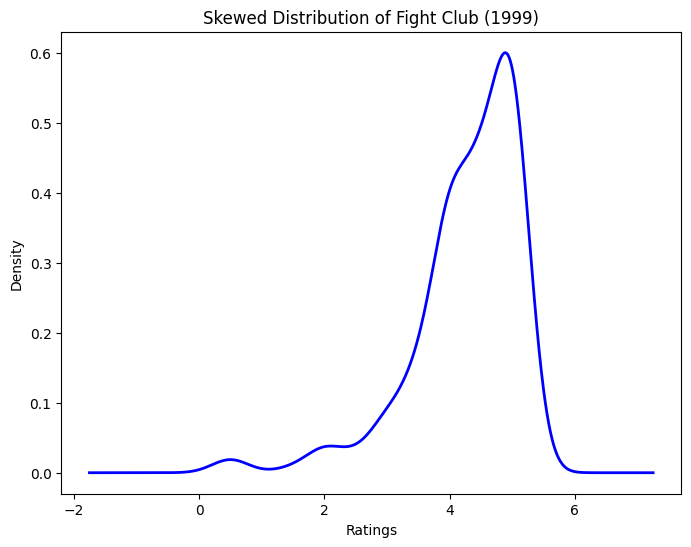

In [17]:
fight_club_ratings = df.loc[df['title'] == 'Fight Club (1999)', 'rating']
plt.figure(figsize=(8, 6))
fight_club_ratings.plot(kind='kde', color='blue', linewidth=2)

plt.title('Skewed Distribution of Fight Club (1999)')
plt.xlabel('Ratings')
plt.ylabel('Density')

plt.show()

Mandatory Operations:
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings.
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

In [18]:
movie_rating=df.groupby('movieId')['rating'].agg(['count','mean']).reset_index()

In [19]:
up_movies=pd.merge(df_movies,movie_rating, on='movieId')

In [20]:
up_movies=up_movies[up_movies['count']>50]

In [21]:
up_movies=up_movies.rename(columns={'count':'number_of_rating','mean':'mean_ratings'})

In [26]:
up_movies

,movieId,title,genres,number_of_rating,mean_ratings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8305,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8372,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8376,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8475,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [22]:
up_movies.groupby('title')['mean_ratings'].max().sort_values(ascending=False)

,mean_ratings
title,
"Shawshank Redemption, The (1994)",4.429022
"Godfather, The (1972)",4.289062
Fight Club (1999),4.272936
Cool Hand Luke (1967),4.271930
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964),4.268041
...,...
Johnny Mnemonic (1995),2.679245
Judge Dredd (1995),2.669355
City Slickers II: The Legend of Curly's Gold (1994),2.645455


In [27]:
up_movies.sort_values(by=["number_of_rating"],ascending=False)

,movieId,title,genres,number_of_rating,mean_ratings
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
...,...,...,...,...,...
3152,4239,Blow (2001),Crime|Drama,51,3.813725
3495,4776,Training Day (2001),Crime|Drama|Thriller,51,3.794118
3544,4848,Mulholland Drive (2001),Crime|Drama|Film-Noir|Mystery|Thriller,51,3.843137
118,145,Bad Boys (1995),Action|Comedy|Crime|Drama|Thriller,51,3.245098


In [29]:
up_movies['genres']=up_movies['genres'].str.split('|')

In [31]:
up_movies[up_movies['genres'].apply(lambda x: 'Sci-Fi' in x)].sort_values(by=["number_of_rating"],ascending=False)

,movieId,title,genres,number_of_rating,mean_ratings
1939,2571,"Matrix, The (1999)","[Action, Sci-Fi, Thriller]",278,4.192446
224,260,Star Wars: Episode IV - A New Hope (1977),"[Action, Adventure, Sci-Fi]",251,4.231076
418,480,Jurassic Park (1993),"[Action, Adventure, Sci-Fi, Thriller]",238,3.750000
507,589,Terminator 2: Judgment Day (1991),"[Action, Sci-Fi]",224,3.970982
898,1196,Star Wars: Episode V - The Empire Strikes Back...,"[Action, Adventure, Sci-Fi]",211,4.215640
...,...,...,...,...,...
8691,122904,Deadpool (2016),"[Action, Adventure, Comedy, Sci-Fi]",54,3.833333
144,172,Johnny Mnemonic (1995),"[Action, Sci-Fi, Thriller]",53,2.679245
2029,2701,Wild Wild West (1999),"[Action, Comedy, Sci-Fi, Western]",53,2.207547
559,673,Space Jam (1996),"[Adventure, Animation, Children, Comedy, Fanta...",53,2.707547


In [32]:
df_links = pd.read_csv('/content/links.csv')

In [33]:
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,9.649827e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,8.474350e+08
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,4.5,1.106636e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.5,1.510578e+09
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,4.5,1.305696e+09


In [34]:
df_new=pd.merge(up_movies,df_links,on='movieId')

In [35]:
df_new.head()

,movieId,title,genres,number_of_rating,mean_ratings,imdbId,tmdbId
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",215,3.920930,114709,862.0
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",110,3.431818,113497,8844.0
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",52,3.259615,113228,15602.0
3,6,Heat (1995),"[Action, Crime, Thriller]",102,3.946078,113277,949.0
4,7,Sabrina (1995),"[Comedy, Romance]",54,3.185185,114319,11860.0
